# Import necessary packages

In [11]:
# Written by Mohd Ibrahim
# Institute of Physics, University of Augsburg, Germany
# email: ibrahim.mohd@physik.uni-augsburg.de

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
from scipy.interpolate import interp1d
from tqdm import tqdm 

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('axes', labelsize=16)

%matplotlib inline

# Useful functions 

## X-ray Form factor (F ($q_z$)):
The form factor is obtained from the fourier transform of the electron density or neutron scattering length density profile (SLD), it is given by <br>
\begin{aligned}
 |F (q)| = \int_{-\infty}^{+\infty}  (\rho_e (z) - \rho_w) e^{-izq_z} dz
\end{aligned}

Where, $\rho_w$ is the bulk water electron density

In [12]:
def form_factor_xray (rho, qmax=0.3, qmin=0, n_points=200, q_array = False, units="Angstrom"):
    
    '''
    
    args:
         rho: electron density, two dimensional array with first coloum distnace and second column electron density.
         qmax: maximum q value up to which form factor is caclculated, default is 0.3
         qmin: minimum q value, default is zero
         
         n_points: number of q points at which form factor is evaluated, Default is 200
         
         q_array: array with q_points, default is False
         
         units: Default is angstroms, other possible value is "nm"
    
    returns:
    
        F (q): x-ray form factor as 2D array with first coloumn "q " and second coloumn F(q)
    
    '''
     
        
    if not q_array:  q_array = np.linspace(qmin,qmax,n_points)
    
    
    if units == "nm": 
        
        rho [:,0] *= 10
        rho [:,1] /= 1000
    

    rho_w  = np.average(rho[0:20,1])
    
    Fq     = np.zeros ((len (q_array), 2))
    
    Fq [:,0] = q_array
    

    for i, q in enumerate (q_array):
                
        real = np.trapz((rho [:,1]-rho_w)*np.cos(q*rho [:,0]),x=rho [:,0])
        imag = np.trapz((rho [:,1]-rho_w)*np.sin(q*rho [:,0]),x=rho [:,0])
        
        Fq [i, 1] = np.absolute ( real + 1j*imag)
        
    return Fq




# X-ray form factor examples

The experimental form factor for DOPC is taken from Lipid14 paper: https://pubs.acs.org/doi/10.1021/ct4010307

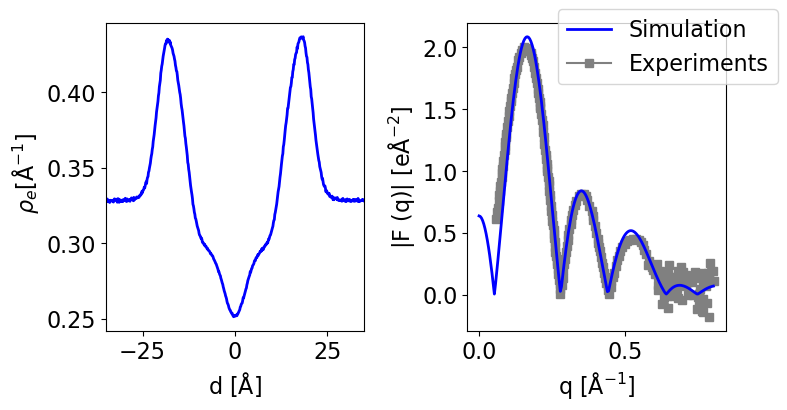

In [13]:
path = "./example-data/"
ED_lipid17  =  np.genfromtxt (path + "amber_ed.xvg", skip_header=24)
F_exp = np.genfromtxt (path + "dopc_ff_exp.dat")

fig    =     plt.figure(figsize=(8,4))
gs     =     fig.add_gridspec(nrows=1, ncols=2,width_ratios=[1,1], wspace=0.4)

ax1    =     fig.add_subplot(gs[0, 0])
ax2    =     fig.add_subplot(gs[0, 1])


F_amber = form_factor_xray (ED_lipid17, qmax=0.8, units="nm")

ax1.plot (ED_lipid17 [:,0], ED_lipid17 [:,1], lw= 2, color="b")
ax1.set_xlim (-35,35)


ax2.plot (F_amber [:,0], F_amber[:,1], zorder=10, lw=2,  color="b", label="Simulation")
ax2.plot (F_exp [:,0], F_exp[:,1],color="gray", marker='s', label="Experiments")

ax2.set_ylabel ( "|F (q)| [e$\mathrm{\AA}^{-2}$]", fontsize=16)
ax2.set_xlabel ( "q [$\mathrm{\AA}^{-1}$]", fontsize=16)

ax1.set_ylabel ( " $\\rho_e [\mathrm{\AA}^{-1}$]", fontsize=16)
ax1.set_xlabel ( "d [$\mathrm{\AA}$]", fontsize=16)

ax2.legend (fontsize=16, loc= (0.35,0.8))